In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import pandas_datareader as pdr
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Accumen challenge/TATAMOTORS.NS (2).csv")

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2005-04-06,78.185287,79.699165,77.878677,78.999718,66.239388,11477775.0
1,2005-04-07,79.526695,81.443001,79.143440,80.877693,67.814018,14158840.0
2,2005-04-08,81.443001,81.960403,80.254890,81.002251,67.918465,10284740.0
3,2005-04-11,79.526695,82.267014,79.162598,80.274055,67.307884,13238772.0
4,2005-04-12,80.676483,81.251373,79.507538,80.657318,67.629234,5348983.0


In [4]:
df['Up Move'] = np.nan
df['Down Move'] = np.nan
df['Average Up'] = np.nan
df['Average Down'] = np.nan
# Relative Strength
df['RS'] = np.nan
# Relative Strength Index
df['RSI'] = np.nan
## Calculate Up Move & Down Move
for x in range(1, len(df)):
    df['Up Move'][x] = 0
    df['Down Move'][x] = 0
    
    if df['Adj Close'][x] > df['Adj Close'][x-1]:
        df['Up Move'][x] = df['Adj Close'][x] - df['Adj Close'][x-1]
        
    if df['Adj Close'][x] < df['Adj Close'][x-1]:
        df['Down Move'][x] = abs(df['Adj Close'][x] - df['Adj Close'][x-1])  
        
## Calculate initial Average Up & Down, RS and RSI
df['Average Up'][14] = df['Up Move'][1:15].mean()
df['Average Down'][14] = df['Down Move'][1:15].mean()
df['RS'][14] = df['Average Up'][14] / df['Average Down'][14]
df['RSI'][14] = 100 - (100/(1+df['RS'][14]))
## Calculate rest of Average Up, Average Down, RS, RSI
for x in range(15, len(df)):
    df['Average Up'][x] = (df['Average Up'][x-1]*13+df['Up Move'][x])/14
    df['Average Down'][x] = (df['Average Down'][x-1]*13+df['Down Move'][x])/14
    df['RS'][x] = df['Average Up'][x] / df['Average Down'][x]
    df['RSI'][x] = 100 - (100/(1+df['RS'][x]))

<ipython-input-4-9cb51f2e8ec4>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Up Move'][x] = 0
<ipython-input-4-9cb51f2e8ec4>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Down Move'][x] = 0
<ipython-input-4-9cb51f2e8ec4>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Up Move'][x] = df['Adj Close'][x] - df['Adj Close'][x-1]
<ipython-input-4-9cb51f2e8ec4>:18: SettingWithCopyWarning: 
A value is trying to be set on 

In [5]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,Up Move,Down Move,Average Up,Average Down,RS,RSI
0,2005-04-06,78.185287,79.699165,77.878677,78.999718,66.239388,11477775.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2005-04-07,79.526695,81.443001,79.143440,80.877693,67.814018,14158840.0,1.574630,0.000000,NaN,NaN,NaN,NaN
2,2005-04-08,81.443001,81.960403,80.254890,81.002251,67.918465,10284740.0,0.104447,0.000000,NaN,NaN,NaN,NaN
3,2005-04-11,79.526695,82.267014,79.162598,80.274055,67.307884,13238772.0,0.000000,0.610581,NaN,NaN,NaN,NaN
4,2005-04-12,80.676483,81.251373,79.507538,80.657318,67.629234,5348983.0,0.321350,0.000000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4439,2023-03-20,415.600006,416.950012,405.500000,410.750000,410.750000,10075022.0,0.000000,8.250000,2.350274,3.495102,0.672448,40.207403
4440,2023-03-21,412.850006,413.899994,407.700012,412.549988,412.549988,7391950.0,1.799988,0.000000,2.310968,3.245452,0.712063,41.590950
4441,2023-03-22,416.000000,418.399994,413.750000,416.100006,416.100006,5728054.0,3.550018,0.000000,2.399471,3.013634,0.796205,44.327076
4442,2023-03-23,416.000000,422.500000,416.000000,419.149994,419.149994,9817460.0,3.049988,0.000000,2.445937,2.798375,0.874056,46.639810


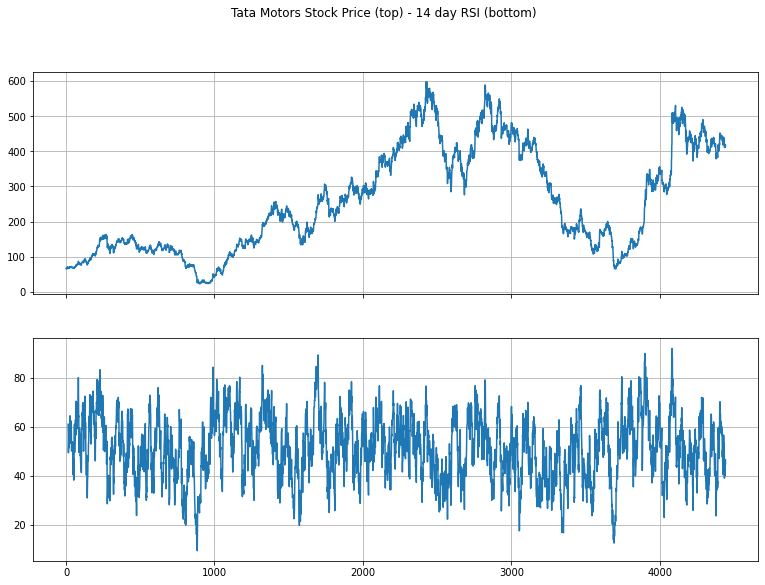

In [6]:

fig, axs = plt.subplots(2, sharex=True, figsize=(13,9))
fig.suptitle('Tata Motors Stock Price (top) - 14 day RSI (bottom)')
axs[0].plot(df['Adj Close'])
axs[1].plot(df['RSI'])
axs[0].grid()
axs[1].grid()

In [6]:
##These values are then used in the final file for predicted values